# <font color='blue'>SENG 474 - Assignment 1</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [2]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

# import dataset
df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# create a classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report




In [3]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
target_names = ['class 0', 'class 1,2,3,4']
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))


#confusion matrix
#Precision measures what fraction of our detections are actually
#positive, and recall measures what fraction of the positives we actually detected.

#The recall is the ratio of the relevant results returned by the search engine to the
#total number of the relevant results that could have been returned.

#Accuracy is defined as the ratio of correctly predicted examples by the total examples

#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution 
#of precision and recall to the F1 score are equal.

               precision    recall  f1-score   support

      class 0       0.74      0.74      0.74        35
class 1,2,3,4       0.65      0.65      0.65        26

     accuracy                           0.70        61
    macro avg       0.70      0.70      0.70        61
 weighted avg       0.70      0.70      0.70        61



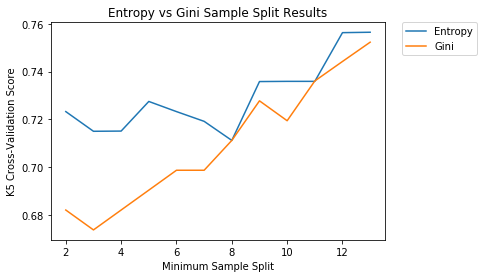

In [13]:
#https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
#Dimosthenis

#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_split=20)
#classifier.fit(X_train, y_train)
from sklearn.model_selection import KFold, cross_val_score

#KFold Cross Validation
min_samples_split_1 = []
for i in range(2,14):
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_split=i)
    scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    min_samples_split_1.append(scores.mean())

min_samples_split_2 = []
for i in range(2,14):
    classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, min_samples_split=i)
    scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    min_samples_split_2.append(scores.mean())

    
from matplotlib import pyplot as plt
plt.title('Entropy vs Gini Sample Split Results')
plt.xlabel('Minimum Sample Split')
plt.ylabel('K5 Cross-Validation Score')
X_grid = np.arange(2,14,1)
X_grid = X_grid.reshape((len(X_grid), 1))
line1 = plt.plot(X_grid, min_samples_split_1, label='Entropy')
line2 = plt.plot(X_grid, min_samples_split_2, label='Gini')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#y_pred = classifier.predict(X_test)
# target_names = ['class 0', 'class 1,2,3,4']
#print(classification_report(y_test, y_pred, target_names=target_names))

In [199]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, min_samples_split=20)
classifier.fit(X_train, y_train)
target_names = ['class 0', 'class 1,2,3,4']
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

      class 0       0.78      0.83      0.81        35
class 1,2,3,4       0.75      0.69      0.72        26

     accuracy                           0.77        61
    macro avg       0.77      0.76      0.76        61
 weighted avg       0.77      0.77      0.77        61



In [210]:
from sklearn.model_selection import KFold, cross_val_score

# kf = KFold(n_splits=5)
# kf.get_n_splits(X)

scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("%.2f\t (+/-) %.2f" % (scores.mean(), scores.std()))


0.79	 (+/-) 0.08


In [274]:
#for visualization only
# from sklearn.tree import export_graphviz 
# from IPython.display import Image  
# from sklearn import tree
# import pydotplus

# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
# classifier.fit(X_train, y_train)
# target_names = ['class 0', 'class 1,2,3,4']
# y_pred = classifier.predict(X_test)

#################################################################
#post pruning by David Dale : https://stackoverflow.com/questions/49428469/pruning-decision-trees
# from sklearn.tree._tree import TREE_LEAF
# def prune_index(inner_tree, index, threshold):
#     if inner_tree.value[index].min() < threshold:
#         # turn node into a leaf by "unlinking" its children
#         inner_tree.children_left[index] = TREE_LEAF
#         inner_tree.children_right[index] = TREE_LEAF
#     # if there are shildren, visit them as well
#     if inner_tree.children_left[index] != TREE_LEAF:
#         prune_index(inner_tree, inner_tree.children_left[index], threshold)
#         prune_index(inner_tree, inner_tree.children_right[index], threshold)

# print(sum(classifier.tree_.children_left < 0))
# # start pruning from the root
# prune_index(classifier.tree_, 0, 5)
# sum(classifier.tree_.children_left < 0)
#################################################################
# dot_data = tree.export_graphviz(classifier, out_file=None,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names=df.columns[:-1])
# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
# Image(graph.create_png())

#samples = # of trained samples
#value = class probability

## References: 
https://scikit-learn.org \
Machine Learning A-Z by Udemy: https://www.udemy.com/course/machinelearning/ \
https://matplotlib.org/tutorials/intermediate/legend_guide.html